In [1]:
%matplotlib inline
from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import statistics

In [ ]:
#SONIA MODI

## Note

`cv2.imshow()` will not work in a notebook, even though the OpenCV tutorials use it. Instead, use `plt.imshow` and family to visualize your results.

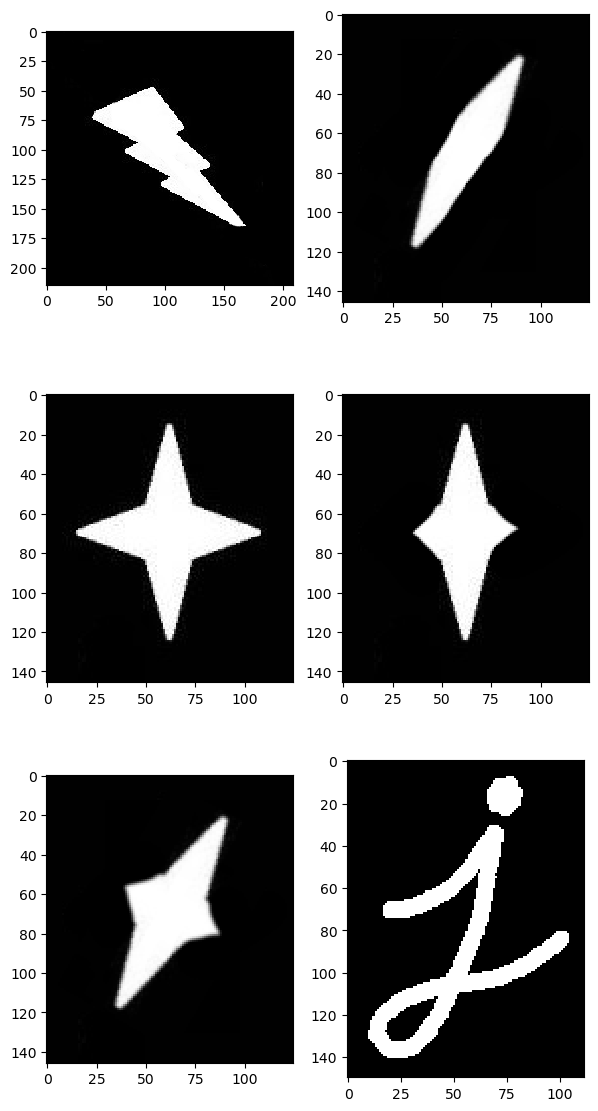

In [11]:
lightningbolt      = cv2.imread('shapes/lightningbolt.png', cv2.IMREAD_GRAYSCALE)
blob               = cv2.imread('shapes/blob.png', cv2.IMREAD_GRAYSCALE)
star               = cv2.imread('shapes/star.png', cv2.IMREAD_GRAYSCALE)
squishedstar       = cv2.imread('shapes/squishedstar.png', cv2.IMREAD_GRAYSCALE)
squishedturnedstar = cv2.imread('shapes/squishedturnedstar.png', cv2.IMREAD_GRAYSCALE)
letterj            = cv2.imread('shapes/letterj.png', cv2.IMREAD_GRAYSCALE)

images = [lightningbolt, blob, star, squishedstar, squishedturnedstar, letterj]

fig,ax = plt.subplots(nrows=3, ncols=2)
for a,i in zip(ax.flatten(), images):
    a.imshow(i, cmap='gray', interpolation='none');
fig.set_size_inches(7,14);

In [3]:
intensity_values = set(lightningbolt.flatten())
print(len(intensity_values))

75


## Question:

What would you expect the value to be, visually? What explains the actual value?

In [4]:
# TODO
# Your Answer
# i think intensity value is probably the brightness of the pixel. Probably represented by a int.

## Thresholding

https://docs.opencv.org/3.4.1/d7/d4d/tutorial_py_thresholding.html

2


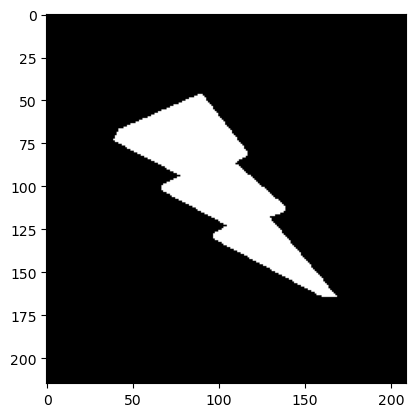

In [5]:
_, lightningbolt = cv2.threshold(lightningbolt,200,255,cv2.THRESH_BINARY)

intensity_values = set(lightningbolt.flatten())
print(len(intensity_values))

plt.imshow(lightningbolt, cmap='gray');

## Question
What happens when the above values are used for thresholding? What is a "good" value for thresholding the above images? Why?

In [6]:
## TODO
## Your answer
# it makes the brighter values white and the darker ones black (each value is now either black or white)
#A good threshold value is one that conserves relevant details without having too much noise.

# Exercises

**Steps**

1. Read each tutorial
    * Skim all parts of each tutorial to understand what each operation does
    * Focus on the part you will need for the requested transformation
2. Apply the transformation and visualize it

## 1. Blend lightningbolt and blob together
https://docs.opencv.org/3.4.1/d0/d86/tutorial_py_image_arithmetics.html

*Remember:* Don't use `imshow` from OpenCV, use `imshow` from `matplotlib`

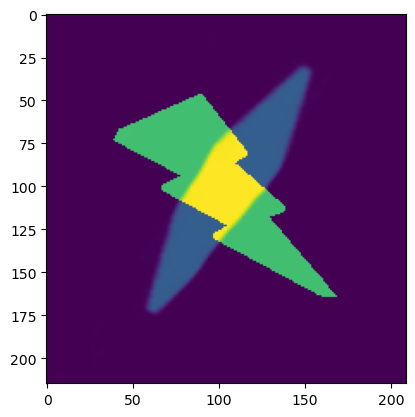

In [7]:
# 1. Blend
# TODO
blob_resized = cv2.resize(blob, (lightningbolt.shape[1], lightningbolt.shape[0]))

dst = cv2.addWeighted(lightningbolt,0.7,blob_resized,0.3,0)
plt.imshow(dst)

## 2. Find a ROI which contains the point of the lightning bolt

https://docs.opencv.org/3.4.1/d3/df2/tutorial_py_basic_ops.html

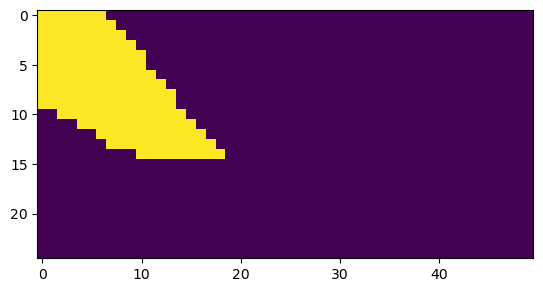

In [8]:
# 2. ROI
# TODO
lightningROI = lightningbolt[150:175, 150:200]
plt.imshow(lightningROI)

## 3. Use an averaging kernel on the letter j

https://docs.opencv.org/3.4.1/d4/d13/tutorial_py_filtering.html

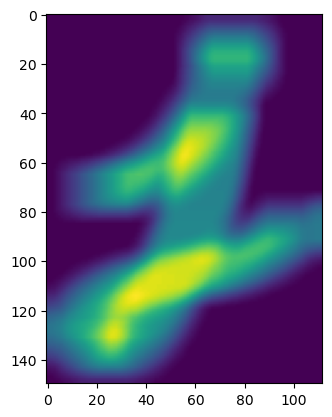

In [9]:
# 3. 
# TODO
blurJ = cv2.blur(letterj,(30,20))
plt.imshow(blurJ)

# Morphology

https://docs.opencv.org/3.4.1/d9/d61/tutorial_py_morphological_ops.html

## 4. Perform erosion on j with a 3x3 kernel

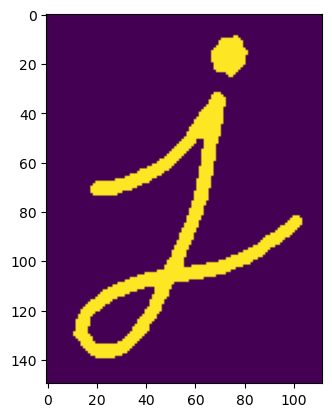

In [41]:
# 4
# TODO
kernel = np.ones((3,3),np.uint8)
erosionJ = cv2.erode(letterj,kernel,iterations = 1)
plt.imshow(erosionJ)

## 5. Perform erosion on j with a 5x5 kernel

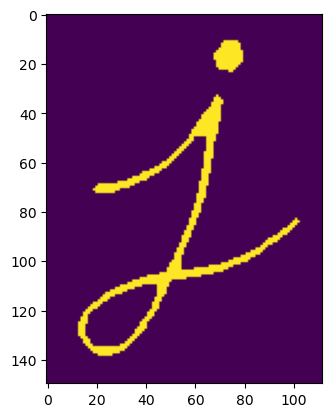

In [16]:
# 5
# TODO
kernel = np.ones((5,5),np.uint8)
erosionJ = cv2.erode(letterj,kernel,iterations = 1)
plt.imshow(erosionJ)

## 6. Perform erosion on j with __two__ iterations, using a kernel size of your choice

Hint: look at the OpenCV API documentation. It is possible to perform two iterations of erosion in one line of Python!

https://docs.opencv.org/3.4.1/d4/d86/group__imgproc__filter.html#gaeb1e0c1033e3f6b891a25d0511362aeb



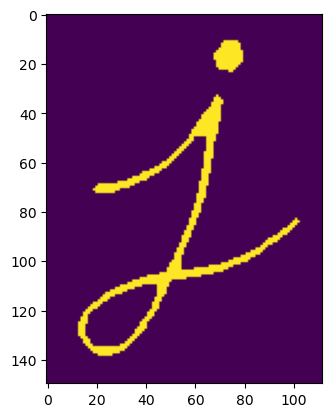

In [18]:
# 6
# TODO
kernel = np.ones((3,3),np.uint8)
erosionJ = cv2.erode(letterj,kernel,iterations = 2)
plt.imshow(erosionJ)

## 7. Perform dilation on j with a 3x3 kernel

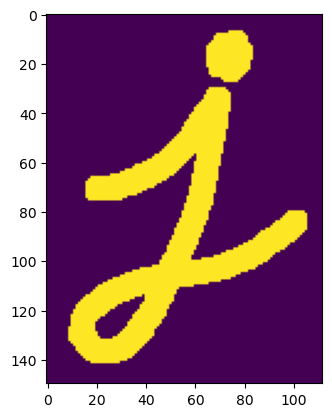

In [19]:
# 7
# TODO
kernel = np.ones((3,3),np.uint8)
dilationJ = cv2.dilate(letterj,kernel,iterations = 1)
plt.imshow(dilationJ)

## 8. Perform dilation on j with a 5x5 kernel

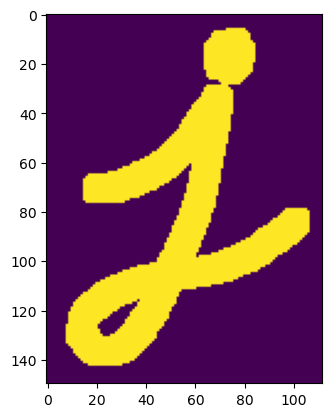

In [20]:
# 8
# TODO
kernel = np.ones((5,5),np.uint8)
dilationJ = cv2.dilate(letterj,kernel,iterations = 1)
plt.imshow(dilationJ)

## 9. What is the effect of kernel size on morphology operations?

In [ ]:
# 9
# TODO
#kernel size changes how big of an effect the morphology has (magnitude)

## 10. What is the difference betweeen repeated iterations of a morphology operation with a small kernel, versus a single iteration with a large kernel?

In [ ]:
# 10
# TODO
#iterations do one and then the other while a larger kernel will just do one operation at once

## 11. Rotate the lightningbolt and star by 90 degrees

https://docs.opencv.org/3.4.1/da/d6e/tutorial_py_geometric_transformations.html

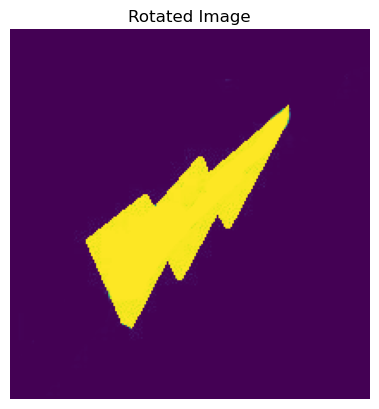

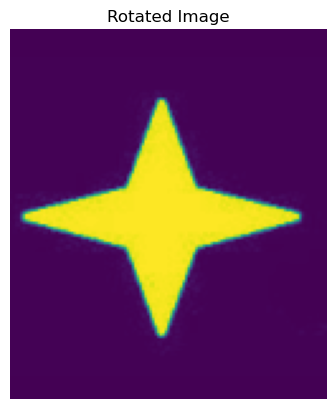

In [23]:
rows, cols = lightningbolt.shape[:2]
M = cv2.getRotationMatrix2D((cols / 2, rows / 2), 90, 1)
dst = cv2.warpAffine(lightningbolt, M, (cols, rows))

plt.imshow(dst)
plt.title('Rotated Image')
plt.axis('off')
plt.show()

rows, cols = star.shape[:2]
M = cv2.getRotationMatrix2D((cols / 2, rows / 2), 90, 1)
dst = cv2.warpAffine(star, M, (cols, rows))

plt.imshow(dst)
plt.title('Rotated Image')
plt.axis('off')
plt.show()

## 12. STRETCH GOAL: 

Visualize the result of Laplacian, Sobel X, and Sobel Y on all of the images. Also, produce a combined image of both Sobel X and Sobel Y for each image. Is Exercise 1 the best way to do this? Are there other options? 

You should have 4 outputs (Laplacian, SobelX, SobelY, and the combination) for each input image visualized at the end.

https://docs.opencv.org/3.4.1/d5/d0f/tutorial_py_gradients.html

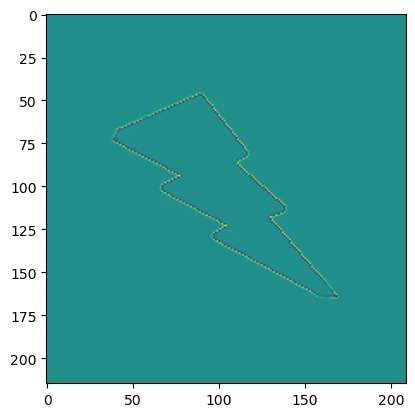

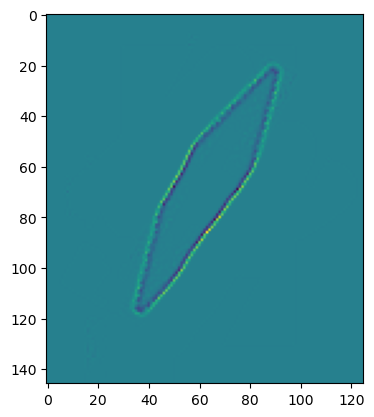

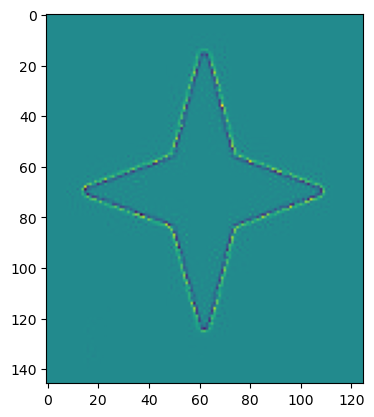

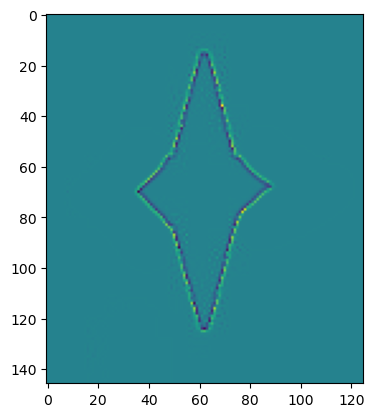

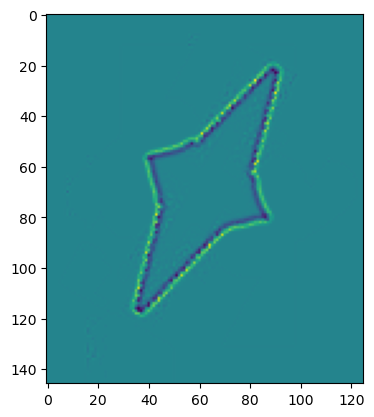

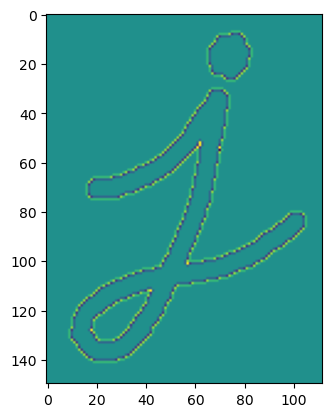

In [45]:
#Laplacian
for img in images:
    laplacian = cv2.Laplacian(img,cv2.CV_64F)
    plt.imshow(laplacian)
    plt.show()


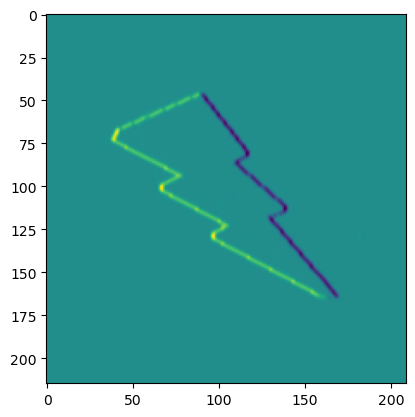

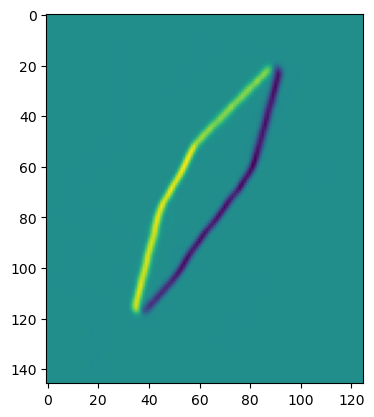

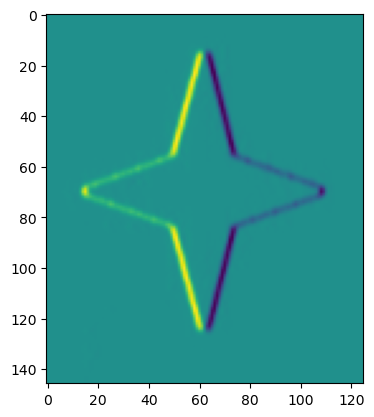

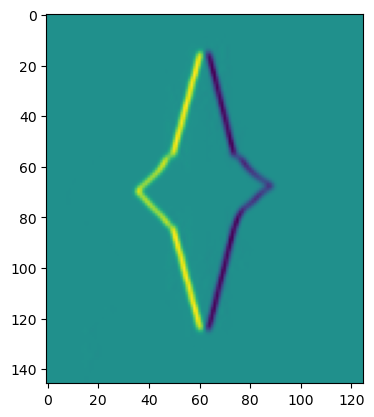

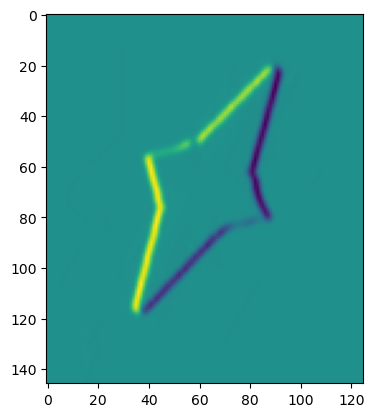

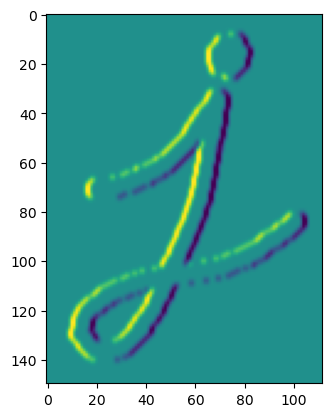

In [44]:
#SOBEL X
for img in images:
    sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
    plt.imshow(sobelx)
    plt.show()

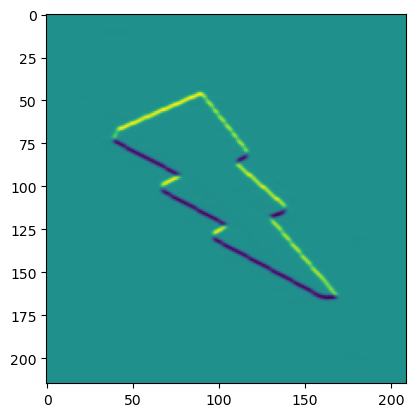

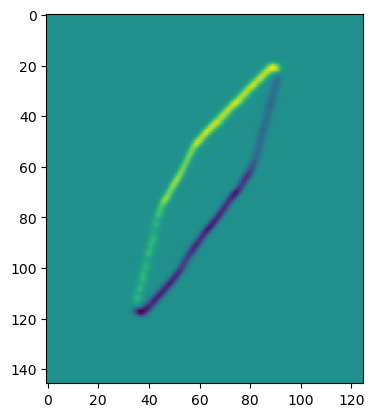

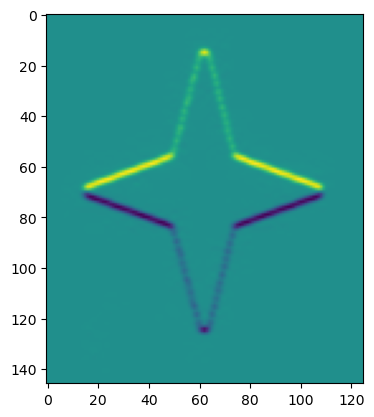

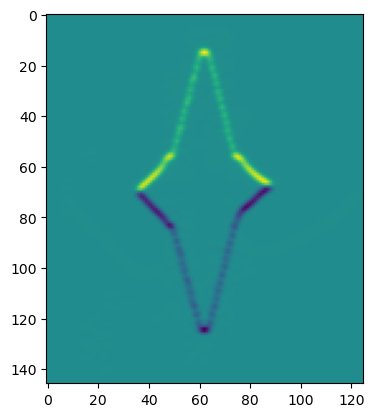

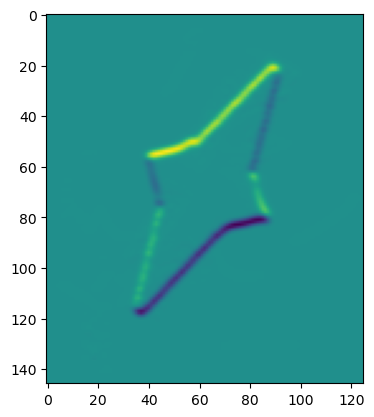

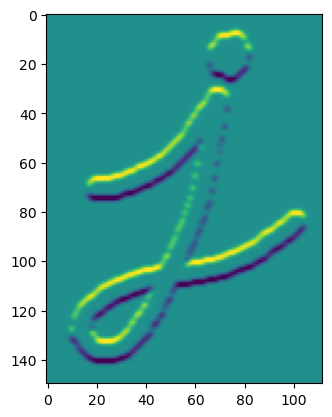

In [42]:
#SOBEL Y
for img in images:
    sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)
    plt.imshow(sobely)
    plt.show()

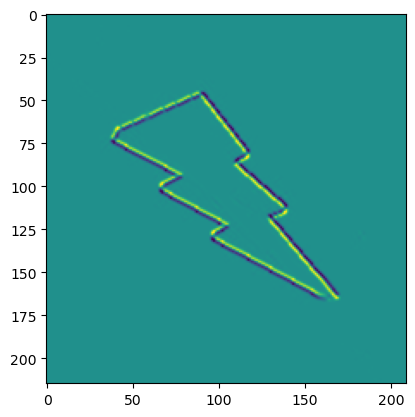

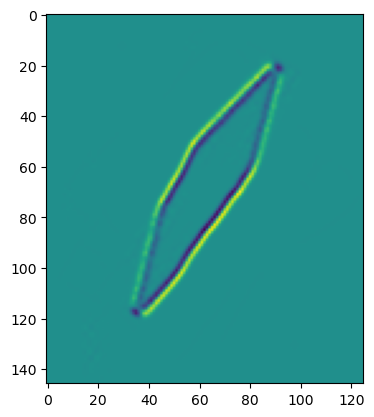

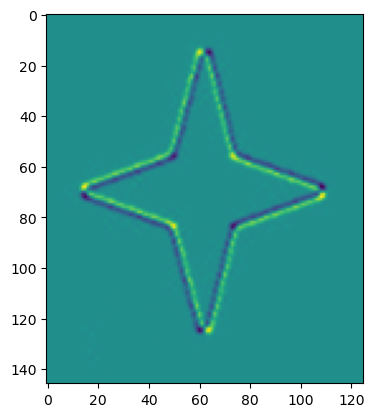

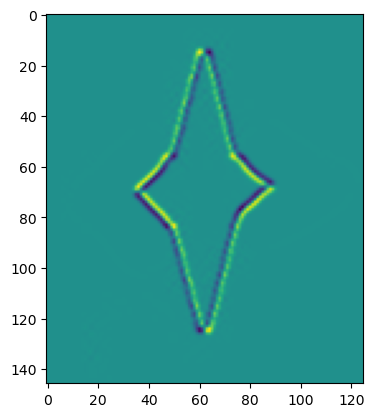

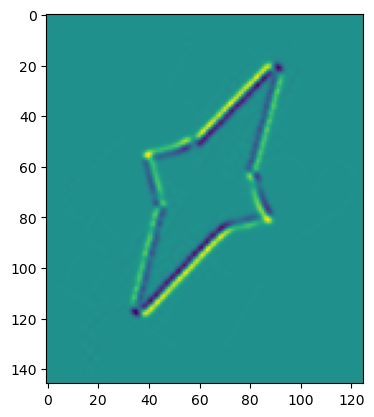

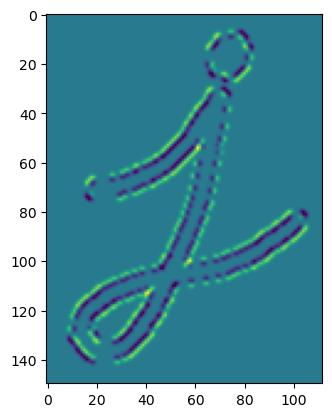

In [43]:
#SOBEL XY
for img in images:
    sobelxy = cv2.Sobel(img,cv2.CV_64F,1,1,ksize=5)
    plt.imshow(sobelxy)
    plt.show()

## When you are done:

You should have one or more images for each exercise.

1. Double-check that you filled in your name at the top of the notebook!
2. Click `File` -> `Export Notebook As` -> `PDF`
3. Email the PDF to `YOURTEAMNAME@beaver.works` 